In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

print(parentdir,currentdir)
from imports import *
from utilsxai import *
import utilsxai

/home/jake/Gits/AI college/XAI/2.problem /home/jake/Gits/AI college/XAI/2.problem/notebooks_backup
/home/jake/Gits/AI college/XAI /home/jake/Gits/AI college/XAI/2.problem
current-> /home/jake/Gits/AI college/XAI/2.problem/models
/home/jake/Gits/AI college/XAI/2.problem


# soft attention 구현 및 roar 측정 

### softattention 3개 구현 
1. cam    
2. resnet   
3. resnet + bam   
4. resnet + cbam  
5. attention and rectify 구현 

### attention gradcam으로 비교 

resnet, resnet+bam, resnet+bam+cbam, attention and rectify gradcam으로 비교   

### Roar kar 비교 평가 

# CAM
cam은 mnist로 테스트   
roar 평가 

In [2]:
def show_images_gradcam(trainloader):
    images = []
    for i , (img, targets) in enumerate(trainloader):
        #print('오리지널:',img.shape)
        #img = img.squeeze()
        torch_img,normed_torch_img=normalize_image(img.cuda())
        #print(normed_torch_img)


        for gradcam, gradcam_pp in cam_dict.values():
            mask, _ = gradcam(normed_torch_img)
            #print(mask.shape,'df')
            heatmap, result = visualize_cam(mask, torch_img)
            #print('heatmap->{} result->{}',heatmap.shape,result.shape)

            images.append(torch.stack([torch_img.squeeze().cpu(), heatmap, result], 0))        
            img = img.squeeze()
            img = (img).permute(1, 2, 0)


        if i==10: break
    images = make_grid(torch.cat(images, 0), nrow=3)
    img_name = 'temp2.jpg'
    output_dir = 'outputs'
    os.makedirs(output_dir, exist_ok=True)
    output_name = img_name
    output_path = os.path.join(output_dir, output_name)

    save_image(images, output_path)
    PIL.Image.open(output_path)

In [3]:
device = 'cuda'
train_loader_mnist = utils.load_data_mnist(batch_size=1,test=False)
test_loader_mnist = utils.load_data_mnist(batch_size=128,test=True)

Processing...
Done!
LOAD DATA, 60000
LOAD DATA, 79


In [3]:
net_mnist = load__MnistCNN().cuda()
mnist_cam = CAM(net_mnist,train_loader_mnist,test_loader_mnist,device,'MNIST')

CAM


In [4]:
ratio = np.arange(0,1,0.1)
ratio

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

Ratio-[0.0%] removed


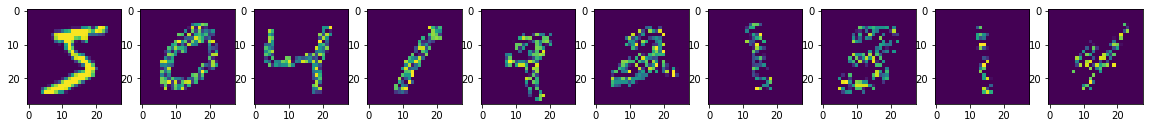

Ratio-[0.1%] removed


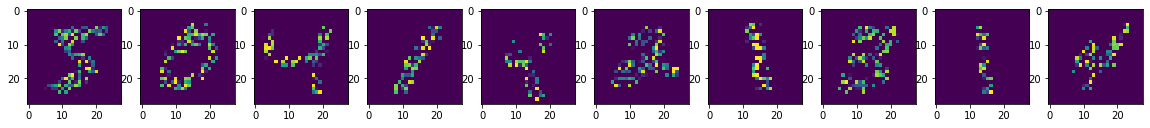

Ratio-[0.2%] removed


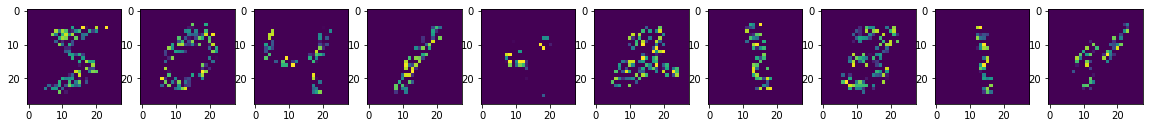

Ratio-[0.30000000000000004%] removed


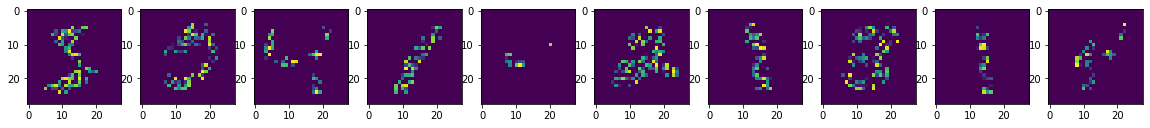

Ratio-[0.4%] removed


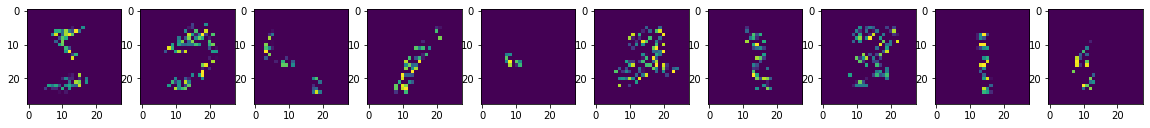

Ratio-[0.5%] removed


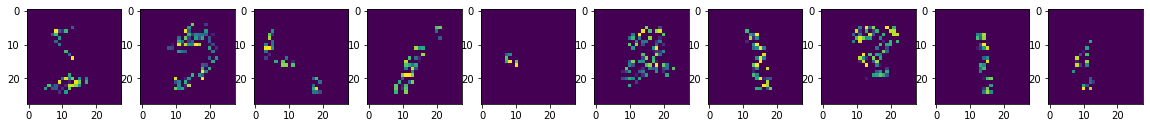

Ratio-[0.6000000000000001%] removed


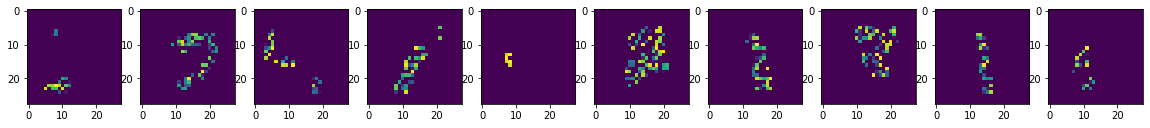

Ratio-[0.7000000000000001%] removed


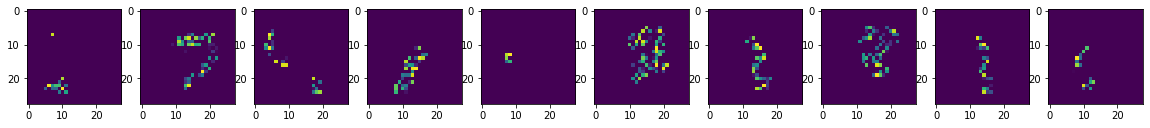

Ratio-[0.8%] removed


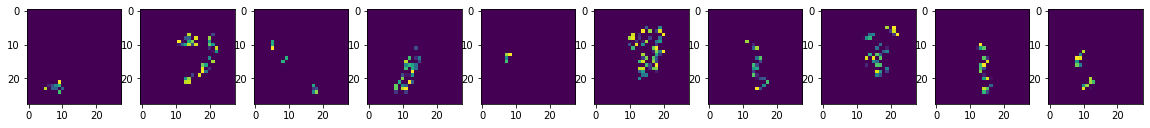

Ratio-[0.9%] removed


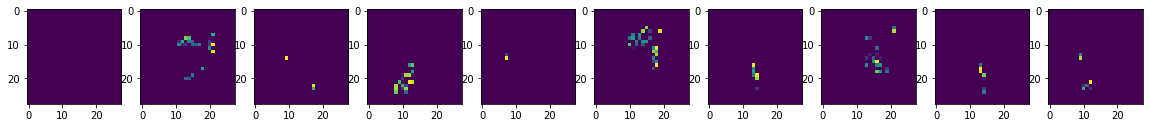

In [5]:
mnist_cam.show_images(limit=9,ratio=ratio)

# 모델들 GRADCAM RESULT비교  

resnet, resnet+bam, resnet+cbam, wide-net, wide-net+ attention and rectify 비교  

In [90]:
datapath ='/home/jake/Gits/AI college/XAI/2.problem/masks/wide-net.h5py'
hf = h5py.File(datapath,'r')
mask = hf['saliencys']
datapath ='/home/jake/Gits/AI college/XAI/2.problem/masks/wide-net-attention.h5py'
hf = h5py.File(datapath,'r')
attention_mask = hf['saliencys']
datapath ='/home/jake/Gits/AI college/XAI/2.problem/masks/resnet50.h5py'
hf = h5py.File(datapath,'r')
attention_resnet_mask = hf['saliencys']
datapath ='/home/jake/Gits/AI college/XAI/2.problem/masks/resnet50_bam_50.h5py'
hf = h5py.File(datapath,'r')
resnet50_bam_50_mask = hf['saliencys']
datapath ='/home/jake/Gits/AI college/XAI/2.problem/masks/resnet50_bam_50.h5py'
hf = h5py.File(datapath,'r')
resnet50_cbam_50_mask = hf['saliencys']
datapath ='/home/jake/Gits/AI college/XAI/2.problem/masks/resnet50_bam_50_layer2.h5py'
hf = h5py.File(datapath,'r')
resnet50_bam_50_layer2_mask = hf['saliencys']
datapath ='/home/jake/Gits/AI college/XAI/2.problem/masks/resnet50_cbam_50_layer2.h5py'
hf = h5py.File(datapath,'r')
datapath ='/home/jake/Gits/AI college/XAI/2.problem/masks/resnet50_bam_50_layer1.h5py'
hf = h5py.File(datapath,'r')
resnet50_bam_50_layer1_mask = hf['saliencys']
datapath ='/home/jake/Gits/AI college/XAI/2.problem/masks/resnet50_cbam_50_layer1.h5py'
hf = h5py.File(datapath,'r')
resnet50_cbam_50_layer1_mask = hf['saliencys']
trainloader = load_data_cifar10(batch_size=1,test=False)
testloader =  load_data_cifar10(batch_size=128, test=True)

Files already downloaded and verified
here
LOAD DATA, 50000
Files already downloaded and verified
here
LOAD DATA, 79


In [60]:
num_images=10
img_names=['origin','wide','wide+rectify','bam','cbam','bam_layer2','cbam_layer2','bam_layer1','cbam_layer1']

def visualize(origin,imgs):
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(1, num_images, 1)
    plt.title('origin image')
    origin = origin.squeeze()
    origin = (origin).permute(1, 2, 0)
    plt.imshow(origin)
    for idx,(img,name) in enumerate(zip(imgs,img_names)):
        plt.subplot(1, num_images, idx+2)
        plt.title(name)
        img = torch.tensor(img)
        img = (img).permute(1, 2, 0)
        plt.imshow(img)

    plt.show()

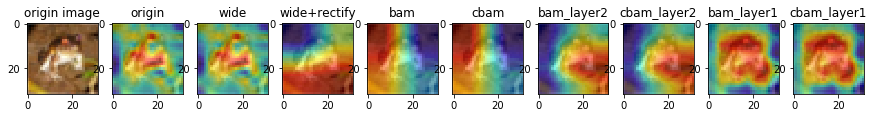

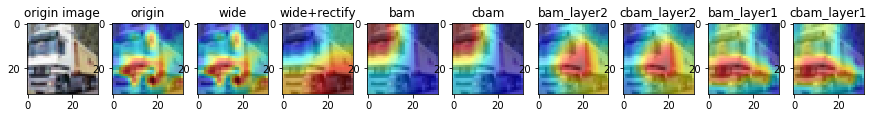

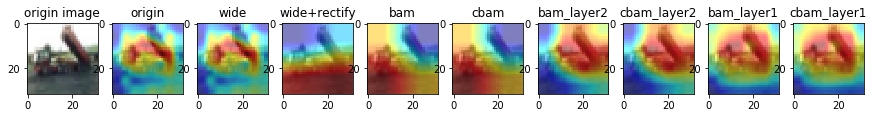

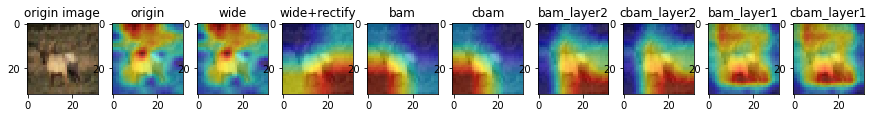

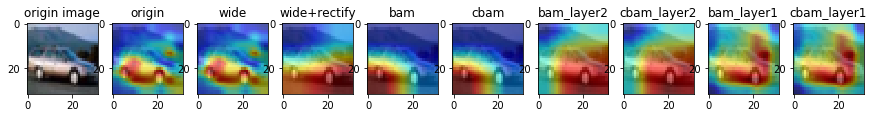

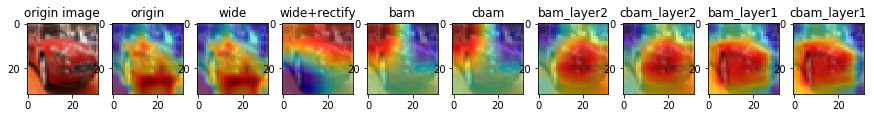

In [62]:
from utilsxai import *
for idx,((origin,target),img,img2,img3,img4,img5,img6,img7,img8,img9)in enumerate(
    zip(trainloader,mask,attention_mask,attention_resnet_mask,
        resnet50_bam_50_mask,resnet50_cbam_50_mask,
        resnet50_bam_50_layer2_mask,resnet50_cbam_50_layer2_mask
       ,resnet50_bam_50_layer1_mask,resnet50_cbam_50_layer1_mask)
):
    imgs = [img,img2,img3,img4,img5,img6,img7,img8,img9]
    visualize(origin,imgs)
    if idx==5:break

# Roar

In [3]:
def accuracy_list(name):
    
    acc_bs_bam=[]
    steps_bs=[]
    ratio = np.arange(0,1,0.1)

    
    save_dir='/home/jake/Gits/AI college/XAI/2.problem/log/'
    save_name=save_dir+ 'ROAR_adjust_0_Resnet.pth'

    for i in ratio:
        save_dir='/home/jake/Gits/AI college/XAI/2.problem/log/'
        save_name=save_dir+ 'ROAR_adjust_{}_{}.hdf5'.format(i,name)
        with h5py.File(save_name,'r') as hf:
            acc_b = np.array(hf['acc'])
            steps_b = np.array(hf['step'])
            acc_bs_bam.append(acc_b)
            steps_bs.append(steps_b)

    acc_bs_bam = np.array(acc_bs_bam)
    steps_bs = np.array(steps_bs)

    f = lambda x: x/100
    acc_bs_bam=f(acc_bs_bam)
    
    
    f = lambda x: x/10
    steps_bs = f(steps_bs)
    return acc_bs_bam,steps_bs

Resnet_BAM_CBAM.pth
Resnet_BAM.pth
Resnet.pth
WideResNet.pth
WideResNet_attention.pth


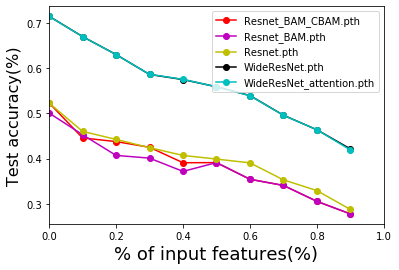

In [6]:
names = ['Resnet_BAM_CBAM.pth','Resnet_BAM.pth','Resnet.pth','WideResNet.pth','WideResNet_attention.pth']
color = ['r','m','y','k','c']
ratio = np.arange(0,1,0.1)

for n,c in zip(names,color):
    print(n)
    acc_bs,steps_bs = accuracy_list(n)

    acc_bs = np.array(acc_bs)
    steps_bs = np.array(steps_bs)


    plt.plot(ratio,acc_bs,'-ok',marker='o',label=n,color=c)
    #plt.plot(ratio,acc_bs_bam,'-ok',marker='o',label="resnet_bam",color='m')
    plt.xlabel('% of input features(%)',fontsize=18)
    plt.ylabel('Test accuracy(%)',fontsize=16)
    plt.legend(numpoints=1)
    plt.xlim(0, 1);